In [125]:
import pandas as pd 
import numpy as np

In [126]:
d = {'x': [1,2,3], 'y': np.array([2,4,8]), 'z': 100}
pd.DataFrame(d, index=[100, 200, 300], columns=['z', 'y', 'x'])
lst = [{'x': 1, 'y': 2, 'z': 100},
     {'x': 2, 'y': 4, 'z': 100},
     {'x': 3, 'y': 8, 'z': 100}]

pd.DataFrame(lst, index=['a','b','c'])
lst2 = [[1, 2, 100],
     [2, 4, 100],
     [3, 8, 100]]

pd.DataFrame(lst2, columns=['x', 'y', 'z'])
arr = np.array([[1, 2, 100],
     [2, 4, 100],
     [3, 8, 100]])

df_ = pd.DataFrame(arr, columns=['x','y','z'], copy=True)
df_

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


In [127]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

index = range(101, 108)
df = pd.DataFrame(data,index=index)
df.to_csv("job_candidates.csv")

In [128]:
pd.read_csv("job_candidates.csv", index_col=0)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [129]:
df.to_numpy()

array([['Xavier', 'Mexico City', 41, 88.0],
       ['Ann', 'Toronto', 28, 79.0],
       ['Jana', 'Prague', 33, 81.0],
       ['Yi', 'Shanghai', 34, 80.0],
       ['Robin', 'Manchester', 38, 68.0],
       ['Amal', 'Cairo', 31, 61.0],
       ['Nori', 'Osaka', 37, 84.0]], dtype=object)

In [130]:
df.dtypes

name         object
city         object
age           int64
py-score    float64
dtype: object

In [131]:
df_ = df.astype(dtype={'age': np.int32, 'py-score': np.float32})
df_.dtypes

name         object
city         object
age           int32
py-score    float32
dtype: object

In [132]:
df.ndim

2

In [133]:
df_.memory_usage()

Index       132
name         56
city         56
age          28
py-score     28
dtype: int64

In [134]:
df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [135]:
# Selects all rows and specific columns 'age' and 'py-score'
df1 = df.loc[:, ['age','py-score']]
df1

,age,py-score
101,41,88.0
102,28,79.0
103,33,81.0
104,34,80.0
105,38,68.0
106,31,61.0
107,37,84.0


In [136]:
# Selects rows with even indices and specific columns 'name' and 'city'
df.loc[[x for x in df.index if not x % 2], ['name','city']]

,name,city
102,Ann,Toronto
104,Yi,Shanghai
106,Amal,Cairo


In [137]:
# Selects all rows and specific columns by integer location
df.iloc[:,[0,2]]

,name,age
101,Xavier,41
102,Ann,28
103,Jana,33
104,Yi,34
105,Robin,38
106,Amal,31
107,Nori,37


In [138]:
# Selects specific rows by integer location
df.iloc[[0, 2], :]

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
103,Jana,Prague,33,81.0


In [139]:
# Accesses a specific cell by label
df.loc[102, 'city']

'Toronto'

In [140]:
# Another way to access a specific cell by label, supposedly faster for scalars
df.at[102, 'city']

'Toronto'

In [141]:
# Accesses a specific cell by integer location
df.iat[2, 1]

'Prague'

In [142]:
# Sets 'py-score' for rows up to index 7 with a list of values
df['py-score'] = df.loc[:7, 'py-score'] = [40, 50, 60, 70, 80, 90,88]
df

,name,city,age,py-score
101,Xavier,Mexico City,41,40
102,Ann,Toronto,28,50
103,Jana,Prague,33,60
104,Yi,Shanghai,34,70
105,Robin,Manchester,38,80
106,Amal,Cairo,31,90
107,Nori,Osaka,37,88


In [143]:
# Sets the last column for all rows to a linearly spaced set of values
df.iloc[:, -1] = np.linspace(20, 50, len(df))
df

,name,city,age,py-score
101,Xavier,Mexico City,41,20
102,Ann,Toronto,28,25
103,Jana,Prague,33,30
104,Yi,Shanghai,34,35
105,Robin,Manchester,38,40
106,Amal,Cairo,31,45
107,Nori,Osaka,37,50


In [144]:
# Stores the row at index 6 in a variable
old_row = df.loc[107]
old_row

name         Nori
city        Osaka
age            37
py-score       50
Name: 107, dtype: object

In [145]:
# Replaces the row at index 106 with new values
df.loc[107] = ['Jack', 'Chicago', 29, 70]
df

,name,city,age,py-score
101,Xavier,Mexico City,41,20
102,Ann,Toronto,28,25
103,Jana,Prague,33,30
104,Yi,Shanghai,34,35
105,Robin,Manchester,38,40
106,Amal,Cairo,31,45
107,Jack,Chicago,29,70


In [146]:
# Inserts a new column 'django-score' at specified location with a list of values
df.insert(loc=4, column='django-score', value=[71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])
df

,name,city,age,py-score,django-score
101,Xavier,Mexico City,41,20,71.0
102,Ann,Toronto,28,25,95.0
103,Jana,Prague,33,30,88.0
104,Yi,Shanghai,34,35,79.0
105,Robin,Manchester,38,40,91.0
106,Amal,Cairo,31,45,91.0
107,Jack,Chicago,29,70,80.0


In [147]:
# Adds a new column 'total-score' initialized with 0.0
df['total-score'] = 0.0
df

,name,city,age,py-score,django-score,total-score
101,Xavier,Mexico City,41,20,71.0,0.0
102,Ann,Toronto,28,25,95.0,0.0
103,Jana,Prague,33,30,88.0,0.0
104,Yi,Shanghai,34,35,79.0,0.0
105,Robin,Manchester,38,40,91.0,0.0
106,Amal,Cairo,31,45,91.0,0.0
107,Jack,Chicago,29,70,80.0,0.0


In [148]:
# Removes the 'total-score' column and returns it
total_score = df.pop('total-score')
#total_score
#df

In [149]:
# Drops the 'age' column
df = df.drop(labels=['age'], axis=1)
df

,name,city,py-score,django-score
101,Xavier,Mexico City,20,71.0
102,Ann,Toronto,25,95.0
103,Jana,Prague,30,88.0
104,Yi,Shanghai,35,79.0
105,Robin,Manchester,40,91.0
106,Amal,Cairo,45,91.0
107,Jack,Chicago,70,80.0


In [150]:
# Replaces the row at index 105 with the previously stored row
df.loc[105] = old_row
df

,name,city,py-score,django-score
101,Xavier,Mexico City,20,71.0
102,Ann,Toronto,25,95.0
103,Jana,Prague,30,88.0
104,Yi,Shanghai,35,79.0
105,Nori,Osaka,50,NaN
106,Amal,Cairo,45,91.0
107,Jack,Chicago,70,80.0


In [151]:
# Changes the 'city' for the row with index 101 to 'Ottawa'
df.loc[101, 'city'] = 'Ottawa'
df

,name,city,py-score,django-score
101,Xavier,Ottawa,20,71.0
102,Ann,Toronto,25,95.0
103,Jana,Prague,30,88.0
104,Yi,Shanghai,35,79.0
105,Nori,Osaka,50,NaN
106,Amal,Cairo,45,91.0
107,Jack,Chicago,70,80.0


In [152]:
# Creates a new row as a Series and appends it to the DataFrame
manju = pd.Series(data=['Manju', 'Boston', 34, 79], index=df.columns, name=17)
df = pd.concat([df, manju.to_frame().T], ignore_index=False)
df

,name,city,py-score,django-score
101,Xavier,Ottawa,20,71.0
102,Ann,Toronto,25,95.0
103,Jana,Prague,30,88.0
104,Yi,Shanghai,35,79.0
105,Nori,Osaka,50,NaN
106,Amal,Cairo,45,91.0
107,Jack,Chicago,70,80.0
17,Manju,Boston,34,79


In [153]:
# Drops the row with label 17
df.drop(labels=[17], inplace=True)
df

,name,city,py-score,django-score
101,Xavier,Ottawa,20,71.0
102,Ann,Toronto,25,95.0
103,Jana,Prague,30,88.0
104,Yi,Shanghai,35,79.0
105,Nori,Osaka,50,NaN
106,Amal,Cairo,45,91.0
107,Jack,Chicago,70,80.0


In [154]:
# Adds a 'js-score' column with a list of values (incomplete list will raise an error)
df['js-score'] = [71.0, 95.0, 88]
# Attempt to insert 'django-score' again, which will raise an error since it already exists
# Similar operations repeated from above, like deleting 'total-score', adding it back, 
# popping it out, dropping 'age' again, setting 'total-score' to 0.0, and reinserting 'django-score'

ValueError: Length of values (3) does not match length of index (7)

In [155]:
# Adds a 'total' column calculated as a weighted sum of scores
df['js-score'] = [71.0, 95.0, 88, 84, 78, 96.7, 91]
df['total'] = 0.3 * df['js-score'] + 0.4 * df['py-score'] + 0.3 * df['django-score']
df

,name,city,py-score,django-score,js-score,total
101,Xavier,Ottawa,20,71.0,71.0,50.6
102,Ann,Toronto,25,95.0,95.0,67.0
103,Jana,Prague,30,88.0,88.0,64.8
104,Yi,Shanghai,35,79.0,84.0,62.9
105,Nori,Osaka,50,NaN,78.0,NaN
106,Amal,Cairo,45,91.0,96.7,74.31
107,Jack,Chicago,70,80.0,91.0,79.3


In [156]:
# Does the same using a Series for weights and computes weighted sum across specified columns
wgts = pd.Series(data=[0.4,0.3,0.3],index=['py-score','django-score','js-score'])
df['total'] = np.sum(df[wgts.index] * wgts, axis=1)
df

,name,city,py-score,django-score,js-score,total
101,Xavier,Ottawa,20,71.0,71.0,50.6
102,Ann,Toronto,25,95.0,95.0,67.0
103,Jana,Prague,30,88.0,88.0,64.8
104,Yi,Shanghai,35,79.0,84.0,62.9
105,Nori,Osaka,50,NaN,78.0,43.4
106,Amal,Cairo,45,91.0,96.7,74.31
107,Jack,Chicago,70,80.0,91.0,79.3


In [157]:
# Sorts DataFrame based on 'js-score' and 'py-score' in descending order
df.sort_values(by=['js-score','py-score'], ascending=[False, False], inplace=True)
df

,name,city,py-score,django-score,js-score,total
106,Amal,Cairo,45,91.0,96.7,74.31
102,Ann,Toronto,25,95.0,95.0,67.0
107,Jack,Chicago,70,80.0,91.0,79.3
103,Jana,Prague,30,88.0,88.0,64.8
104,Yi,Shanghai,35,79.0,84.0,62.9
105,Nori,Osaka,50,NaN,78.0,43.4
101,Xavier,Ottawa,20,71.0,71.0,50.6


In [158]:
# Filters DataFrame based on conditions for 'py-score' or 'js-score'
filter_ = (df['py-score'] >= 40.0) | (df['js-score'] >= 90)
df[filter_]

,name,city,py-score,django-score,js-score,total
106,Amal,Cairo,45,91.0,96.7,74.31
102,Ann,Toronto,25,95.0,95.0,67.0
107,Jack,Chicago,70,80.0,91.0,79.3
105,Nori,Osaka,50,NaN,78.0,43.4


In [159]:
# Replaces 'js-score' with 0.0 where 'js-score' is less than 80
df['js-score'].where(cond=df['js-score'] >= 80, other=0.0)

106    96.7
102    95.0
107    91.0
103    88.0
104    84.0
105     0.0
101     0.0
Name: js-score, dtype: float64

In [160]:
# Filters DataFrame columns matching regex "score"
df.filter(regex="score")

,py-score,django-score,js-score
106,45,91.0,96.7
102,25,95.0,95.0
107,70,80.0,91.0
103,30,88.0,88.0
104,35,79.0,84.0
105,50,NaN,78.0
101,20,71.0,71.0


In [161]:
# Calculates mean of 'py-score' column
df['py-score'].mean()

39.285714285714285

In [162]:
# Calculates standard deviation of 'py-score' column
df['py-score'].std()

17.18249385968449

In [163]:
# Generates descriptive statistics for the DataFrame
df.describe()

,js-score
count,7.000000
mean,86.242857
std,9.283293
min,71.000000
25%,81.000000
50%,88.000000
75%,93.000000
max,96.700000


In [164]:
#missing values referred to by NaN
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
df_

,x
0,1.0
1,2.0
2,NaN
3,4.0


In [165]:
df_.mean()

x    2.333333
dtype: float64

In [166]:
df_.mean(skipna=False)

x   NaN
dtype: float64

In [167]:
1 + 2 + np.nan

nan

In [168]:
df_.fillna(value=0)

,x
0,1.0
1,2.0
2,0.0
3,4.0


In [169]:
df_.bfill() #Fill NA/NaN values by using the next valid observation to fill the gap.

,x
0,1.0
1,2.0
2,4.0
3,4.0


In [170]:
df_.interpolate() #Fill NaN values using an interpolation method

,x
0,1.0
1,2.0
2,3.0
3,4.0


In [171]:
is_dataframe = isinstance(df, pd.DataFrame)
print(is_dataframe)

True


In [172]:
'''
for col_label, col in df.iteritems():
    print(col_label, col, sep='\n', end='\n\n')
'''

"\nfor col_label, col in df.iteritems():\n    print(col_label, col, sep='\n', end='\n\n')\n"

In [173]:
for row in df.itertuples(index=False, name="JobCandidate"):
    #print(f"Name: {row.name}, City: {row.city}, Total: {row.total}")
    print(row)

JobCandidate(name='Amal', city='Cairo', _2=45, _3=91.0, _4=96.7, total=74.31)
JobCandidate(name='Ann', city='Toronto', _2=25, _3=95.0, _4=95.0, total=67.0)
JobCandidate(name='Jack', city='Chicago', _2=70, _3=80.0, _4=91.0, total=79.3)
JobCandidate(name='Jana', city='Prague', _2=30, _3=88.0, _4=88.0, total=64.8)
JobCandidate(name='Yi', city='Shanghai', _2=35, _3=79.0, _4=84.0, total=62.900000000000006)
JobCandidate(name='Nori', city='Osaka', _2=50, _3=nan, _4=78.0, total=43.4)
JobCandidate(name='Xavier', city='Ottawa', _2=20, _3=71.0, _4=71.0, total=50.6)


In [174]:
temp_c = [8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]
dt = pd.date_range(start='2019-10-27 00:00:00', periods=24, freq='h')
type(dt)

pandas.core.indexes.datetimes.DatetimeIndex

In [175]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


In [176]:
type(temp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [177]:
temp['2019-10-27 05':'2019-10-27 15']
temp.resample(rule='6h').min()

,temp_c
2019-10-27 00:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 12:00:00,17.9
2019-10-27 18:00:00,9.1


In [178]:
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


In [179]:
temp.rolling(window=3, center=True).mean()
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


In [180]:
type(temp.index)
temp['2019-10-27 05':'2019-10-27 15']
temp.resample(rule='6h').min()
temp
temp.rolling(window=3, center=True).mean()

,temp_c
2019-10-27 00:00:00,NaN
2019-10-27 01:00:00,7.300000
2019-10-27 02:00:00,6.766667
2019-10-27 03:00:00,6.400000
2019-10-27 04:00:00,5.933333
2019-10-27 05:00:00,5.400000
2019-10-27 06:00:00,5.066667
2019-10-27 07:00:00,6.300000
2019-10-27 08:00:00,8.966667
2019-10-27 09:00:00,12.400000


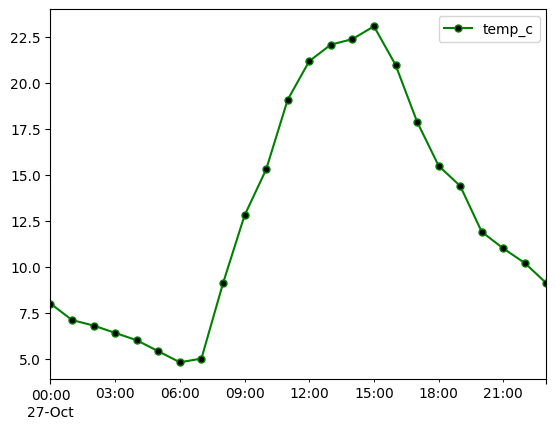

In [181]:
temp.plot.line(color='g', style='.-', mfc='k', ms=10).get_figure().savefig('temperatures.png')

<Axes: ylabel='Frequency'>

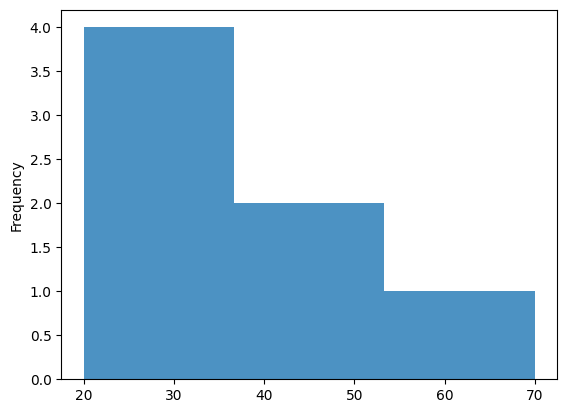

In [182]:
df['py-score'].plot.hist(bins=3, alpha=0.8)

<Axes: ylabel='Frequency'>

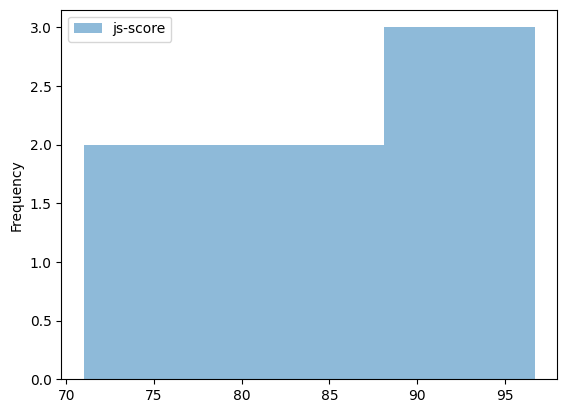

In [124]:
df[['js-score','total']].plot.hist(bins=3, alpha=0.5)